Now to detect color we need to know what is color in pixels of an image. Images are made of tiny dots of pixels each having a color and we can define those colors in terms of HSV -> Hue, Saturation, Value.

The hue of a pixel is an angle from 0 to 359 the value of each angle decides the color of the pixel the order of the color is same but i reverse as the order in rainbow order from red to violet and again back to red

The Saturation is basically how saturated the color is, and the Value is how bright or dark the color is

So the range of these are as follows

+ Hue is mapped – >0º-359º as [0-179]
+ Saturation is mapped ->  0%-100% as [0-255]
+ Value is 0-255 (there is no mapping)
So what does that mean.. It means for hue if we select for example 20 it will take it as 40º in terms of degree,
And for saturation 255 means 100% saturate and 0 means 0% saturate

Enough Talking lets jump back to code. We need to tell out program that we only want green color object to be detected rest of the colors we are not interested in. to do that we need to decide a rage for HSV value for Green (as there are lots of variation of green color)

lowerBound=np.array([33,80,40])

For white color:
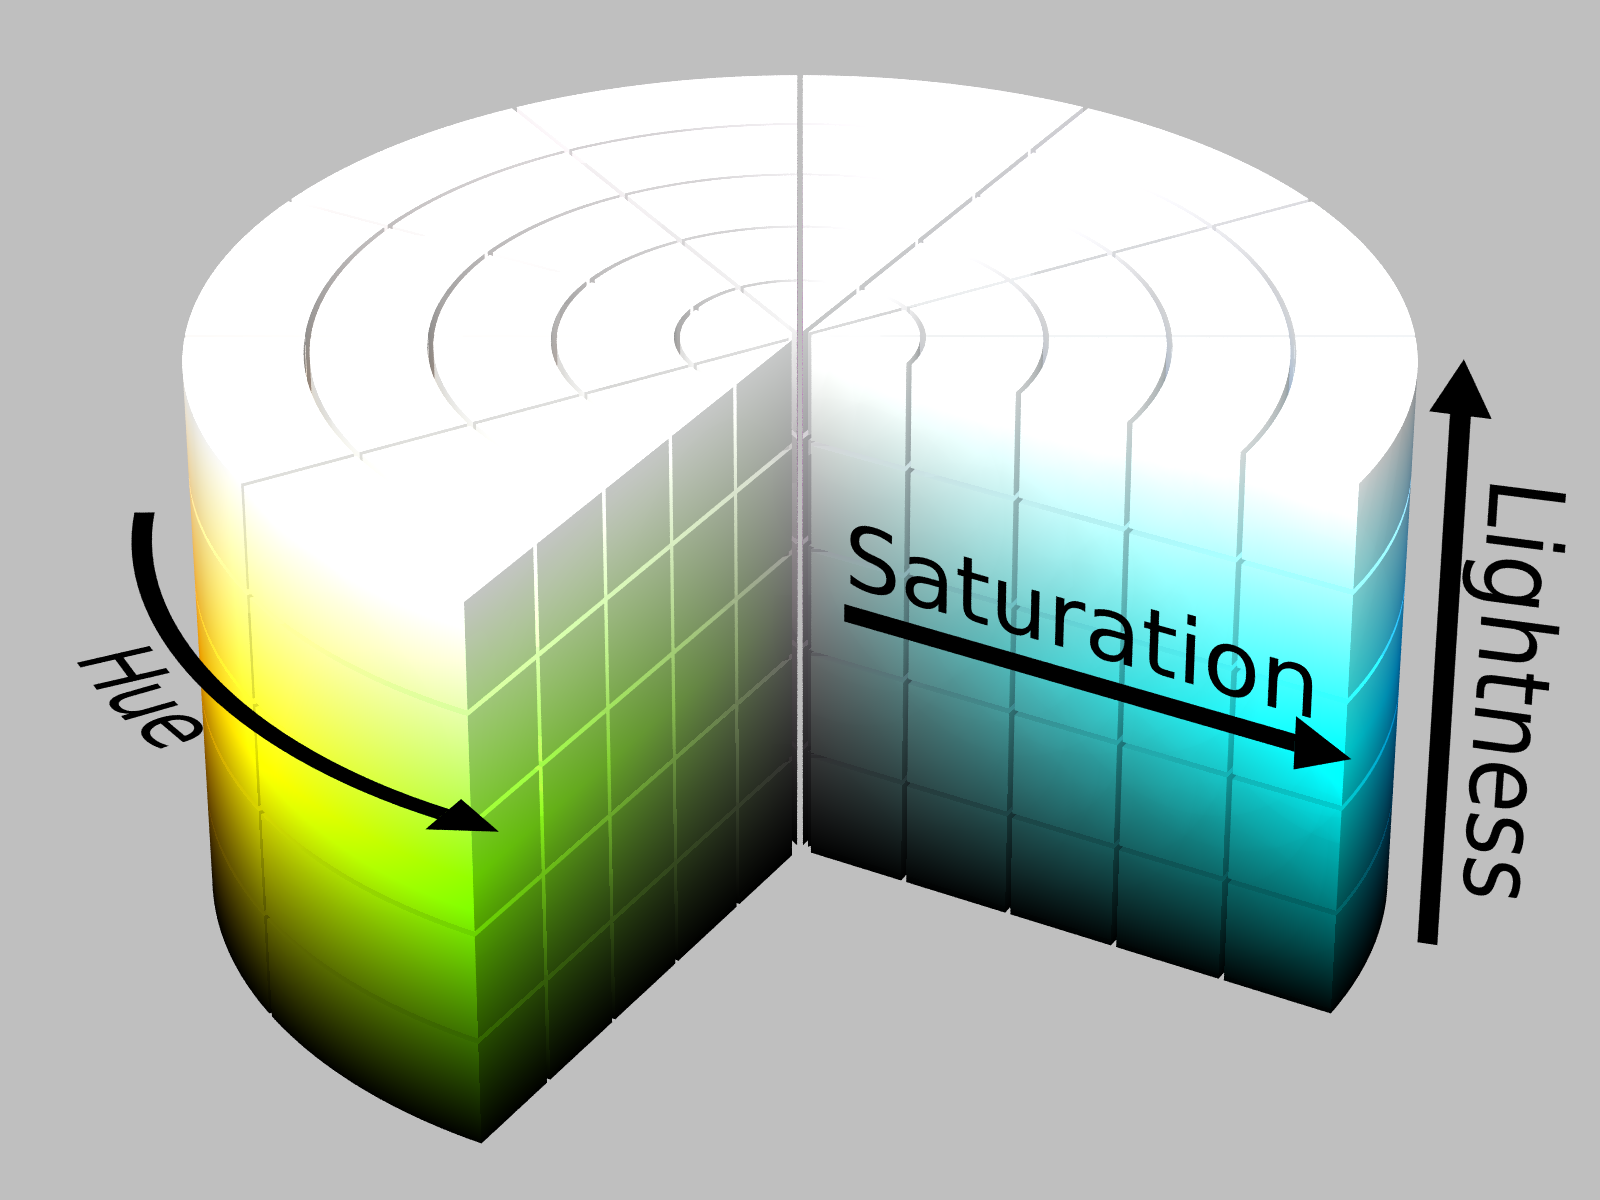


For any other color:
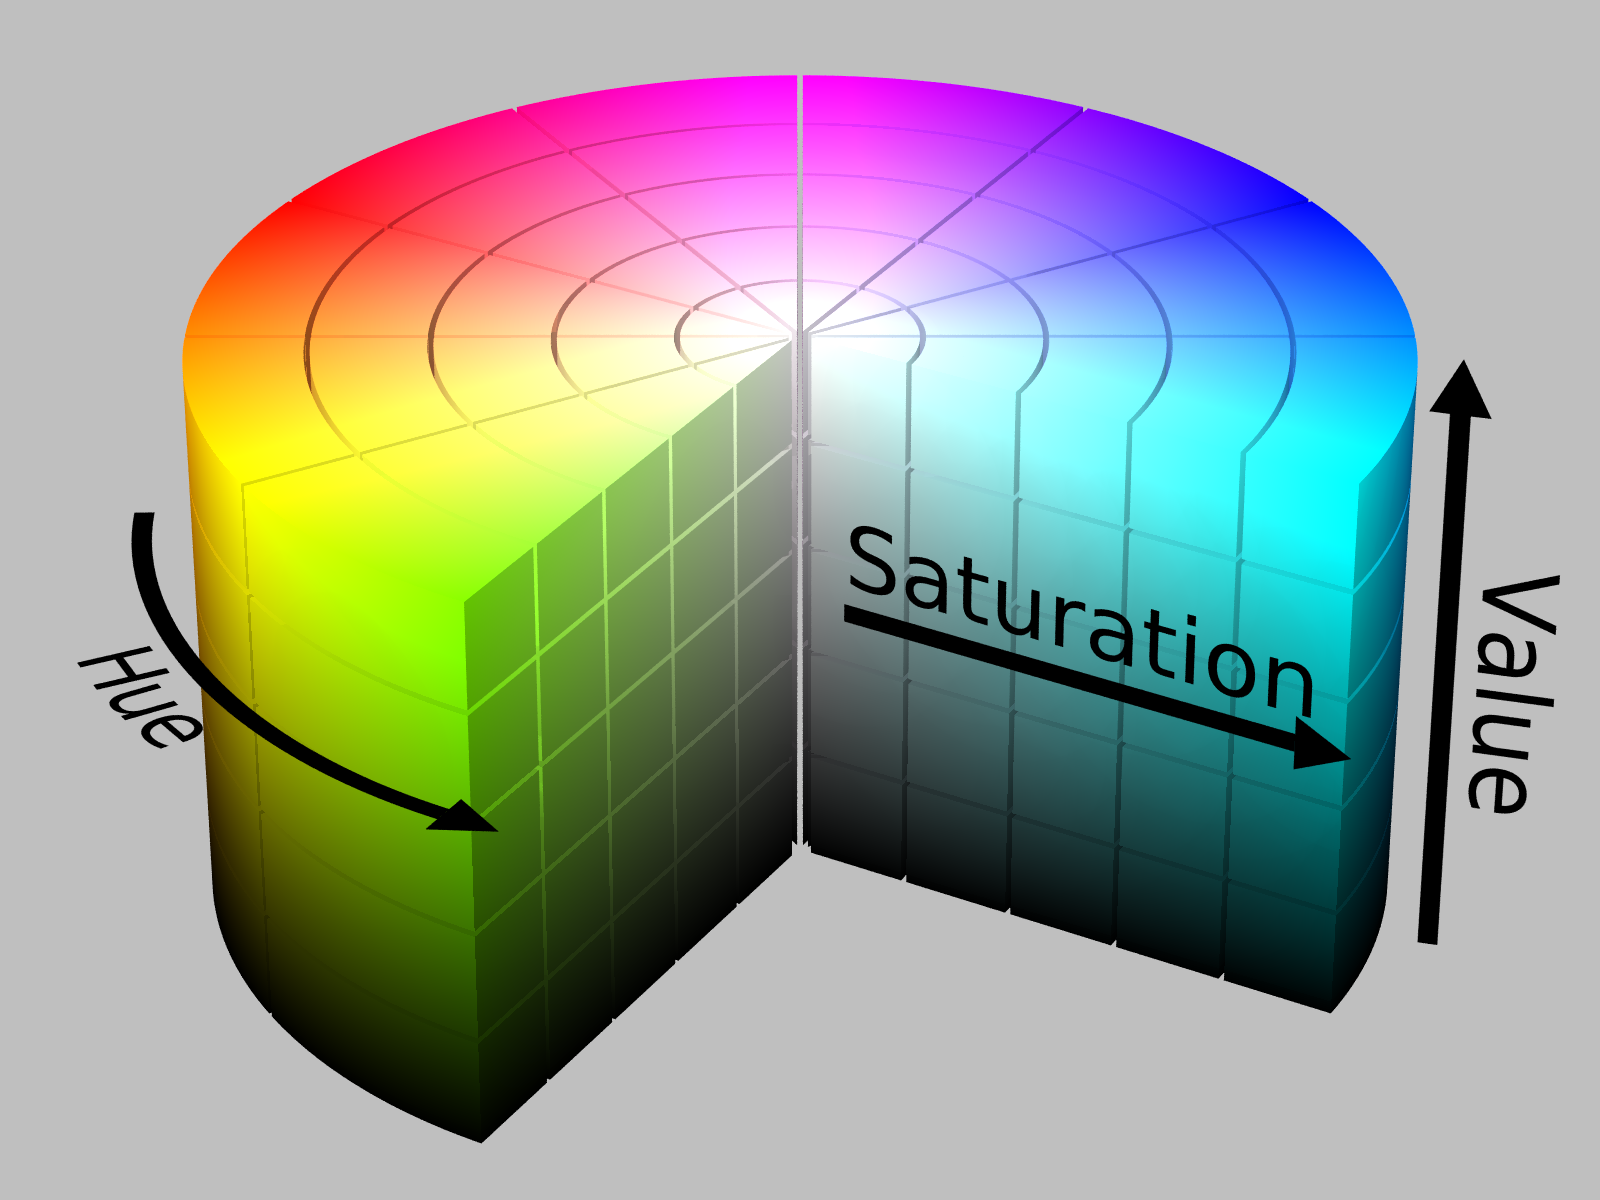

For lower and upper boundary range of the colors use this photo:
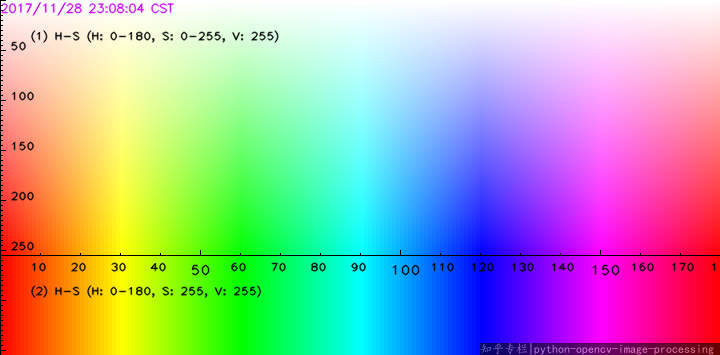


As an example the red color has a H range between [0,10] while S is [100, 255] and always keep V [20, 255]

so, lower_red = [0, 100, 20] and upper_red = [10, 255, 255]

HSV stands for Hue, Saturation, Value

Huw means the color, example: yellow, red, maginta, etc..

Saturation means how much is the quantity of that color we want to have 0->white and 255->max 

Value means the brightness of the color 0>completly black

Some noises will occur, so we need to remove them.

to do that we need to do some morphological operation called opening and closing

opening will remove all the dots randomly popping here and there and closing will close the small holes that are present in the actual object

so before doing that we need a 2d matrix called kernal which is basically to control the effects of opening and closing

In [2]:
import cv2 as cv
import numpy as np

cap = cv.VideoCapture(0)

kernel_size_open = np.ones((5,5))
kernel_size_close = np.ones((20,20))


while True:
    ret, frame = cap.read()
    hsv_frame = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
    
    # We need to define the lowest part of a specific color and the highest
    # These values were obtained through experience 
    
    # All colors except white
    low = np.array([0, 42, 0])
    high = np.array([179, 255, 255])
    mask = cv.inRange(hsv_frame, low, high)
    mask_open = cv.morphologyEx(mask, cv.MORPH_OPEN, kernel_size_open)
    mask_close = cv.morphologyEx(mask_open, cv.MORPH_OPEN, kernel_size_close)
    maskFinal=mask_close
    conts,h=cv.findContours(maskFinal.copy(),cv.RETR_EXTERNAL,cv.CHAIN_APPROX_NONE)
    cv.drawContours(frame,conts,-1,(255,0,0),3)
    result = cv.bitwise_and(frame, frame, mask=mask) 
    
    
    
    
    cv.imshow('Frame', frame)
    cv.imshow('Result', result)
    cv.imshow('Final Mask', maskFinal)
    
    key = cv.waitKey(1)
    if key == 27:
        break

cap.release()
cv.destroyAllWindows()